<a href="https://colab.research.google.com/github/deepak3081996/LengthOfFishPrediction/blob/master/LengthOfFishPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the datasets

In [0]:
import bs4 as bs
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fetching the data
## Reading data from the source url

In [0]:
source = urllib.request.urlopen(r'https://people.sc.fsu.edu/~jburkardt/datasets/regression/x06.txt').read()

soup = bs.BeautifulSoup(source, 'lxml')

lines = soup.p.contents[0].split('\n')

# Removing the empty lines from the fetched data

In [0]:
try:
    for line in lines[-1::-1]:
        if line == '':
            lines.pop()
except:
    pass

# Creating the dataset

In [4]:
l1 = []
noOfColumns = 0
noOfRows = 0
for line in lines:
  
    if line[0] == '#':    # avoiding all the lines stating with '#' character
        print(line)
        continue

    if line[0] != '#' and (noOfColumns==0 or noOfRows==0):    # fetching the number of rows and columns
        datalist = line.split(' ')

        if datalist[1] == 'columns':
            noOfColumns = int(datalist[0])
            col = 0

        elif datalist[1] == 'rows':
            noOfRows = int(datalist[0])
            row = 0

    elif line[0] != '#' and noOfColumns>0 and noOfRows>0:    # fetfching all the rows and columns in 1-dimentional array as a list
        datalist = line.strip().split()

        if col<noOfColumns:
            l1.append(' '.join(datalist))
            col += 1

        elif row<noOfRows:
            l1 += datalist
            row += 1
            
dataset = np.array([l1]).reshape((noOfRows+1,noOfColumns))    # Creating the dataset from the of shape(rows, columns) from the 1-D array with the coumns headers


#  x06.txt
#
#  Reference:
#
#    R J Freund and P D Minton,
#    Regression Methods,
#    Dekker, 1979, page 111.
#
#    Helmut Spaeth,
#    Mathematical Algorithms for Linear Regression,
#    Academic Press, 1991, page 305,
#    ISBN 0-12-656460-4.
#
#  Discussion:
#
#    The length of a species of fish is to be represented as a function
#    of the age and water temperature.  The fish are kept in tanks
#    at 25, 27, 29 and 31 degrees Celsius.  After birth, a test specimen
#    is chosen at random every 14 days and its length measured.
#
#    There are 44 rows of data.  The data include:
#
#      I,  the index;
#      A1, the age of the fish;
#      A2, the water temperature in degrees Celsius;
#      B,  the length of the fish.
#
#    We seek a model of the form:
#
#      B = A1 * X1 + A2 * X2
#


## Printing the Dataset

In [0]:
print(dataset)

[['Index' 'Age of fish (days)' 'Temperature of water (degrees Celsius)'
  'Length of fish']
 ['1' '14' '25' '620']
 ['2' '28' '25' '1315']
 ['3' '41' '25' '2120']
 ['4' '55' '25' '2600']
 ['5' '69' '25' '3110']
 ['6' '83' '25' '3535']
 ['7' '97' '25' '3935']
 ['8' '111' '25' '4465']
 ['9' '125' '25' '4530']
 ['10' '139' '25' '4570']
 ['11' '153' '25' '4600']
 ['12' '14' '27' '625']
 ['13' '28' '27' '1215']
 ['14' '41' '27' '2110']
 ['15' '55' '27' '2805']
 ['16' '69' '27' '3255']
 ['17' '83' '27' '4015']
 ['18' '97' '27' '4315']
 ['19' '111' '27' '4495']
 ['20' '125' '27' '4535']
 ['21' '139' '27' '4600']
 ['22' '153' '27' '4600']
 ['23' '14' '29' '590']
 ['24' '28' '29' '1305']
 ['25' '41' '29' '2140']
 ['26' '55' '29' '2890']
 ['27' '69' '29' '3920']
 ['28' '83' '29' '3920']
 ['29' '97' '29' '4515']
 ['30' '111' '29' '4520']
 ['31' '125' '29' '4525']
 ['32' '139' '29' '4565']
 ['33' '153' '29' '4566']
 ['34' '14' '31' '590']
 ['35' '28' '31' '1205']
 ['36' '41' '31' '1915']
 ['37' '5

# Pre-processing of data
## creating a pandas dataframe

In [0]:
df = pd.DataFrame(data=dataset[1:,1:],    # selecting all the rows and columns starting from 1st index location i.e. 2nd row and 2nd column as the data
                 index=dataset[1:,0],     # 1st column of the dataset is the index and the rows starting from 1st index location
                 columns=dataset[0,1:],   # ist row of the dataset is the column names it's the 0th row of the dataset
                 dtype = 'float64')

## let's have a look at the dataframe

In [6]:
print(df)

    Age of fish (days)  Temperature of water (degrees Celsius)  Length of fish
1                 14.0                                    25.0           620.0
2                 28.0                                    25.0          1315.0
3                 41.0                                    25.0          2120.0
4                 55.0                                    25.0          2600.0
5                 69.0                                    25.0          3110.0
6                 83.0                                    25.0          3535.0
7                 97.0                                    25.0          3935.0
8                111.0                                    25.0          4465.0
9                125.0                                    25.0          4530.0
10               139.0                                    25.0          4570.0
11               153.0                                    25.0          4600.0
12                14.0                              

## fetching the Independent Variables and Dependent Variable

In [0]:
X = df.iloc[:,:2].values
y = df.iloc[:,2:].values

# splitting the data into training set and testing set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature Scalling

In [0]:
# Feature Scaling
from  sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

sc_y = StandardScaler()
y_train_scaled = sc_y.fit_transform(y_train)

### Since the above data frame contains 2 independent variables therefore the model need to be implemented is multi linear regression
#### the equation of mult linear regression is :
    y = a0 + a1*x1 + a2*x2 + ..... +an*xn
#### the model required in the above the dataset seek to be in the form of:
    y = a1*x1 + a2*x2
#### thereby multi linear regression model hold the above required

# Fitting the Multi Linear Regression model to the dataset

In [10]:
from  sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting the test set results

In [0]:
y_pred = linear_regressor.predict(X_test_scaled)

In [12]:
print(sc_y.inverse_transform(y_pred))

[[2398.45358914]
 [1879.04148755]
 [2248.05168898]
 [2029.44338771]
 [1317.78085638]
 [3505.48419344]
 [3054.27849294]
 [1754.99745891]
 [4530.31929866]
 [2685.26829151]
 [3792.2988958 ]]


In [0]:
print(y_test)

[[ 2710.]
 [ 2140.]
 [ 2890.]
 [ 2140.]
 [ 1205.]
 [ 3040.]
 [ 3110.]
 [ 1215.]
 [ 4530.]
 [ 2600.]
 [ 3935.]]


In [14]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
print(r2_score(y_test, sc_y.inverse_transform(y_pred)))
print(mean_absolute_error(y_test, sc_y.inverse_transform(y_pred)))
print(mean_squared_error(y_test, sc_y.inverse_transform(y_pred)))

0.8888613086942116
247.93477788901092
103746.59058158191


# Visualising the results
## Visualising the training set results

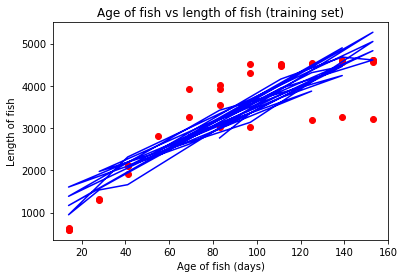

In [15]:
plt.scatter(X_train[:,0], y_train, color='red')
plt.plot(X_train[:,0], sc_y.inverse_transform(linear_regressor.predict(X_train_scaled)), color='blue')
plt.title('Age of fish vs length of fish (training set)')
plt.xlabel('{}'.format(df.columns[0]))
plt.ylabel('{}'.format(df.columns[-1]))
plt.show()

# Visualising using 3d graphs

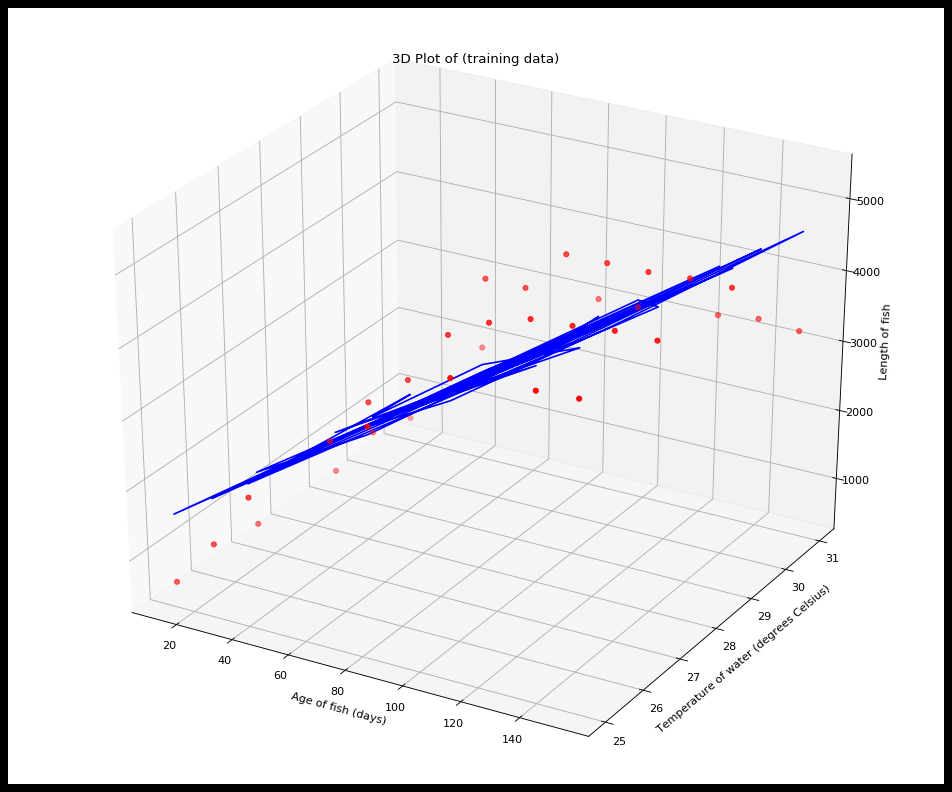

In [58]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(12, 10), dpi= 80, facecolor='k', edgecolor='k')
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X_train[:,0], X_train[:,1], y_train, color='red', marker='o')
ax.plot(X_train[:,0].flatten(), X_train[:, 1].flatten(), sc_y.inverse_transform(linear_regressor.predict(X_train_scaled)).flatten(), color='blue')

ax.set_xlabel('{}'.format(df.columns[0]))
ax.set_ylabel('{}'.format(df.columns[1]))
ax.set_zlabel('{}'.format(df.columns[-1]))
plt.title("3D Plot of (training data)")
plt.tight_layout()
plt.show()

## Visualizing the test set results 

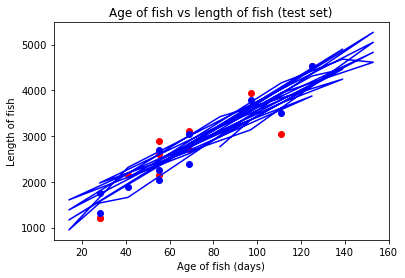

In [0]:
plt.scatter(X_test[:,0], y_test, color='red')
plt.scatter(X_test[:,0], sc_y.inverse_transform(y_pred), color='blue')
plt.plot(X_train[:,0], sc_y.inverse_transform(linear_regressor.predict(X_train_scaled)), color='blue')
plt.title('Age of fish vs length of fish (test set)')
plt.xlabel('{}'.format(df.columns[0]))
plt.ylabel('{}'.format(df.columns[-1]))
plt.show()

# Visualising using 3d graphs

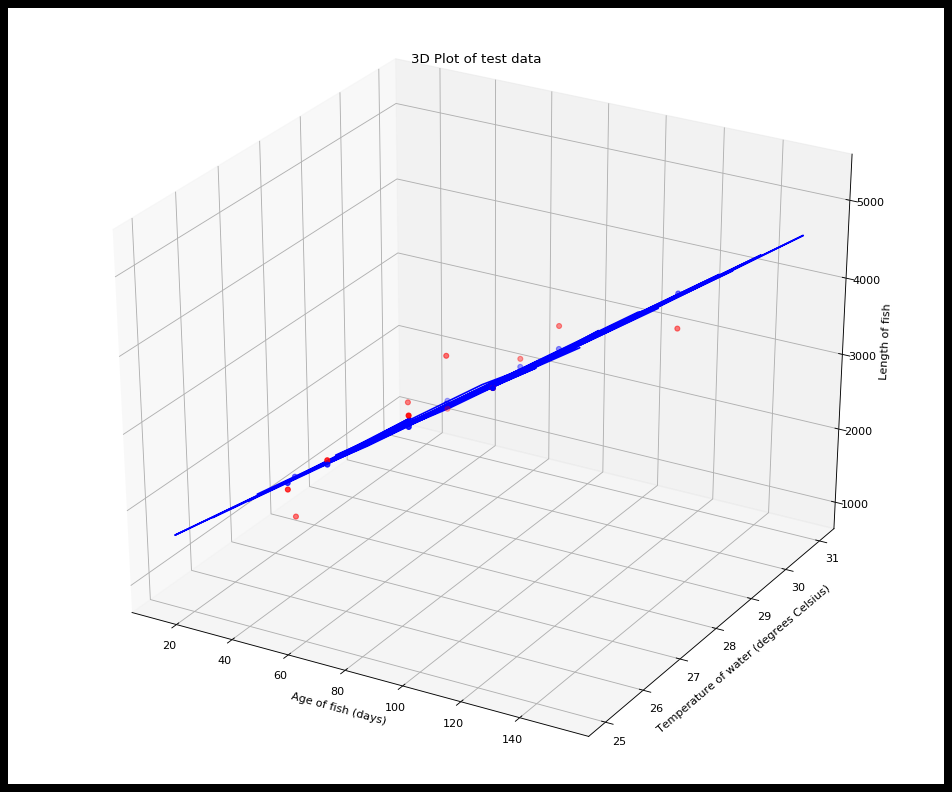

In [57]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(12, 10), dpi= 80, facecolor='k', edgecolor='k')
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='red', marker='o')
ax.scatter(X_test[:, 0], X_test[:, 1], sc_y.inverse_transform(y_pred), color='blue', marker='o')
ax.plot(X_train[:,0].flatten(), X_train[:, 1].flatten(), sc_y.inverse_transform(linear_regressor.predict(X_train_scaled)).flatten(), color='blue')

ax.set_xlabel('{}'.format(df.columns[0]))
ax.set_ylabel('{}'.format(df.columns[1]))
ax.set_zlabel('{}'.format(df.columns[-1]))
plt.title("3D Plot of test data")
plt.tight_layout()
plt.show()